# Unit 4 - Noisy data
---

1. [Boxplots](#section1)
2. [Histograms](#section2)
3. [Standard deviation](#section3)
3. [Same stats, different graphs](#section4)



Introducing an additional library: [seaborn](https://seaborn.pydata.org/) - for statistical data visualization


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns  # for creating the graphs

<a id='section1'></a>

### 1. Boxplots 

What are they good for? Let's look at an example with the Titanic dataset

#### Titanic dataset

In [4]:
titanic_df = sns.load_dataset('titanic')

In [3]:
titanic_df.shape

(891, 15)

In [4]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### We would like to vizualize the passengers `age`

##### Attempt #1: With `scatterplot`



<AxesSubplot:>

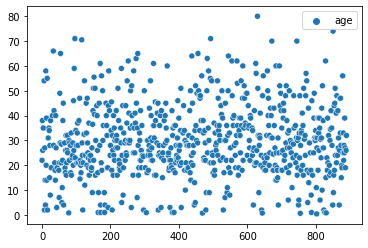

In [5]:
sns.scatterplot(data = titanic_df[['age']])

This is the raw data:

axis x - the 891 passangers 

axis y - the age of each passenger

This is not informative

##### Attempt #2: With `lineplot`

<AxesSubplot:>

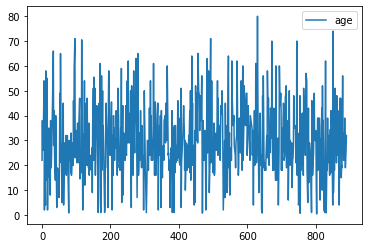

In [6]:
sns.lineplot(data = titanic_df[['age']])

##### Attempt #3:`boxplot`

<AxesSubplot:>

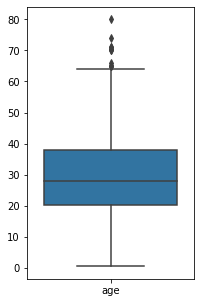

In [106]:
plt.figure(figsize=(3,5))
sns.boxplot(data = titanic_df[['age' ]])

The data seems fine. What would we think if we had the outliers under the bottom whisker?

---
#### Back to our vaccinations data:

In [5]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 
vacc_df.head(2)

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


use a groupby and look at part of the data, by location:

In [6]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].max()
grouped_df.reset_index(inplace = True)

In [109]:
grouped_df.tail()

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
230,Wallis and Futuna,343.0,58.20,NaN
231,World,43567688.0,57.16,18.68
232,Yemen,10240.0,1.33,NaN
233,Zambia,36338.0,11.21,0.18
234,Zimbabwe,75000.0,22.84,2.32


fix the NaN's, or else the graphs will just ignore them

In [7]:
grouped_df.fillna(0, inplace = True)

In [8]:
grouped_df.tail()

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
230,Wallis and Futuna,432.0,55.53,27.53
231,World,43687709.0,61.73,29.13
232,Yemen,10240.0,1.36,0.00
233,Zambia,117635.0,26.49,0.17
234,Zimbabwe,121347.0,29.34,6.97


Also remove world and other places that are not a country, like in the previous unit

#### sort the values using 'sort_values()`

In [11]:
grouped_df.sort_values('total_boosters_per_hundred', ascending = False).head(10)

,location,daily_vaccinations,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
42,Chile,298756.0,90.47,134.53
81,Gibraltar,1068.0,126.79,111.29
224,Uruguay,49502.0,84.36,82.53
131,Malta,8191.0,89.30,79.47
187,Singapore,76344.0,91.69,78.09
204,Taiwan,585216.0,83.63,77.99
105,Japan,1691704.0,82.29,76.98
195,South Korea,880931.0,86.16,76.70
103,Italy,665063.0,80.95,72.04
24,Bhutan,91636.0,86.62,70.73


<AxesSubplot:ylabel='total_boosters_per_hundred'>

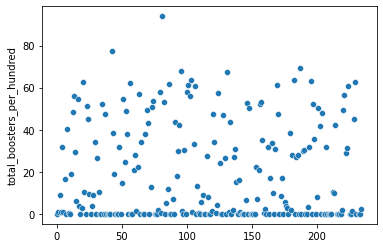

In [18]:
sns.scatterplot(data = grouped_df['total_boosters_per_hundred'])

<AxesSubplot:>

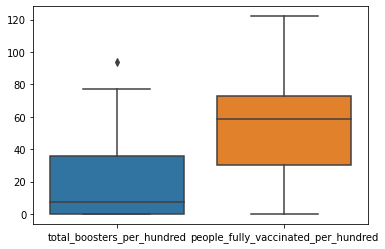

In [19]:
sns.boxplot(data = grouped_df[['total_boosters_per_hundred','people_fully_vaccinated_per_hundred' ]])

It's not perfect. Or else we would have had outliers for any number over a 100. 

<a id='section2'></a>

### 2. Histograms

Back to the titanic

Count passengers according to their age:

<AxesSubplot:xlabel='age', ylabel='Count'>

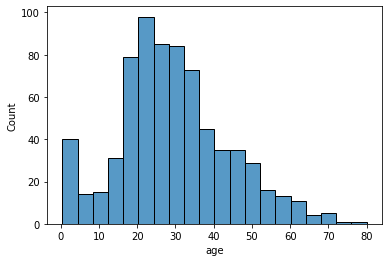

In [20]:
sns.histplot(data=titanic_df, x='age')

Percent of passangers at each age:

<AxesSubplot:xlabel='age', ylabel='Percent'>

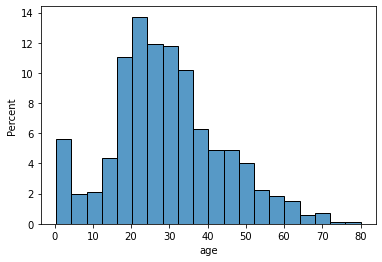

In [21]:
sns.histplot(data=titanic_df, x='age', stat='percent')

Probabiltiy that a passanger is at a certain age:

<AxesSubplot:xlabel='age', ylabel='Probability'>

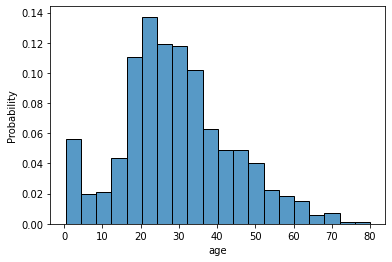

In [22]:
sns.histplot(data=titanic_df, x='age', stat='probability')

Density - the area of the histogram equals 1

<AxesSubplot:xlabel='age', ylabel='Density'>

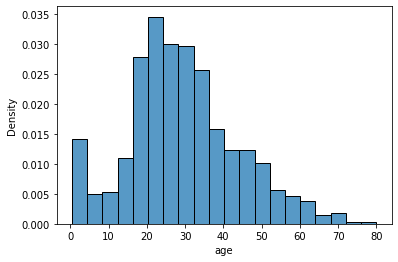

In [23]:
sns.histplot(data=titanic_df, x='age', stat='density')

---
Shape is the same so long as number of bins is the same. 

Change the number of bins:

<AxesSubplot:xlabel='age', ylabel='Percent'>

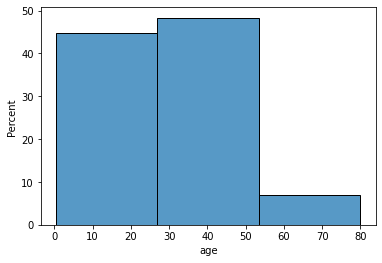

In [115]:
sns.histplot(data=titanic_df, x='age', stat='percent', bins=3)

---
Histograms of males and females:

<AxesSubplot:xlabel='age', ylabel='Percent'>

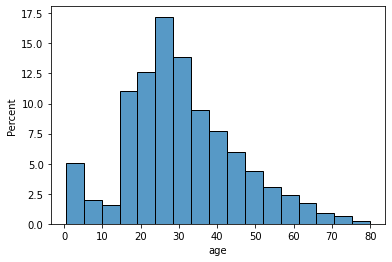

In [24]:
sns.histplot(data=titanic_df[titanic_df.sex == 'male'], x='age', stat='percent')

---
>
>#### Now you:
>create a histogram for the age of female passangers on the titanic:
>

---



These two histograms don't have the same number of bins

In [25]:
len(titanic_df[titanic_df.sex == 'male'])

577

In [26]:
len(titanic_df[titanic_df.sex == 'female'])

314

---
>#### Now you:
> how can you fix this?
>

---

Both sexs on the same graph:

In [33]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:xlabel='age', ylabel='Percent'>

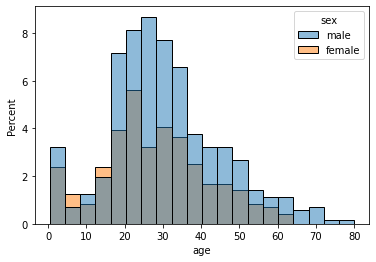

In [54]:
sns.histplot(data=titanic_df, x='age', stat='percent', hue='sex', multiple = 'layer')

---
> Now you:
>
> try other options:
>
> `multiple{“layer”, “dodge”, “stack”, “fill”}`
>
> what is the default?
>


---
#### Back to our vaccinations data:

In [116]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
vacc_df = pd.read_csv(url) 

In [117]:
grouped_df = vacc_df.groupby('location')[['daily_vaccinations','people_fully_vaccinated_per_hundred','total_boosters_per_hundred']].max()
grouped_df.reset_index(inplace = True)

In [118]:
grouped_df.drop(grouped_df.loc[grouped_df.location == 'World'].index, inplace = True)
grouped_df.fillna(0, inplace = True)

<AxesSubplot:xlabel='total_boosters_per_hundred', ylabel='Percent'>

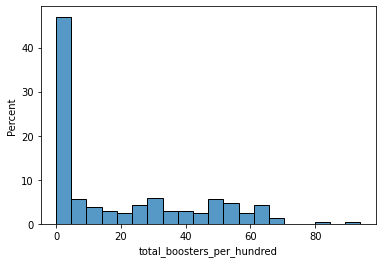

In [119]:
sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

In [32]:
len(grouped_df)

234

Lets remove countries that didn't issue boosters:

In [40]:
grouped_df.drop(grouped_df[grouped_df.total_boosters_per_hundred == 0].index, inplace=True)

In [41]:
len(grouped_df)

157

<AxesSubplot:xlabel='total_boosters_per_hundred', ylabel='Percent'>

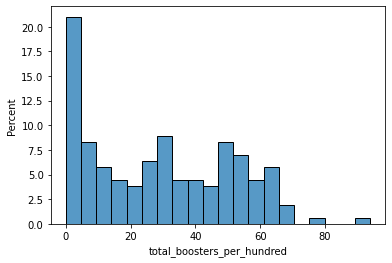

In [42]:
sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

Note that the y-axis is only up to 20% now

---
>#### Your turn:
>
>Do the same, but for another column



---

<a id='section3'></a>

### 3. Standard deviation

An small example showing that the more the data is spread, the higher the std:

In [43]:
df = pd.DataFrame({'height' : [161, 156, 172], 
                   'weight': [67, 65, 89],
                   'age': [20,20,20]})
df

,height,weight,age
0,161,67,20
1,156,65,20
2,172,89,20


In [37]:
df.mean()

height    163.000000
weight     73.666667
age        20.000000
dtype: float64

Look at the `std` for height, weight and age. Why are they different?

In [ ]:
df.std()

height     8.185353
weight    13.316656
age        0.000000
dtype: float64

---
>### Functions covered in this unit:
>
> `scatterplot` - (x,y) points on the graphs
>
> `lineplot` - simple lineplot
>
> `plt.figure(fixsize(m,n))` - set the size of the graph\figure to (m,n)
>
> `boxplot` - create a boxplot
>
> `reset_index` - reset index to a numerical index beginning at 0
>
> `sort_values()` - sorts values 
>
> `histplot` - create a histogram
>
> `std()` - standard deviation
>
---

<a id='section4'></a>

### 4. Same stats, different graphs

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/DatasaurusDozen.tsv'

In [3]:
dino = pd.read_csv(url, sep='\t')

In [4]:
dino.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


How many datasets?

In [46]:
dino['dataset'].unique()

array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [122]:
dino.groupby('dataset').agg(['count', 'mean', 'std'])

x                           y                      
           count       mean        std count       mean        std
dataset                                                           
away         142  54.266100  16.769825   142  47.834721  26.939743
bullseye     142  54.268730  16.769239   142  47.830823  26.935727
circle       142  54.267320  16.760013   142  47.837717  26.930036
dino         142  54.263273  16.765142   142  47.832253  26.935403
dots         142  54.260303  16.767735   142  47.839829  26.930192
h_lines      142  54.261442  16.765898   142  47.830252  26.939876
high_lines   142  54.268805  16.766704   142  47.835450  26.939998
slant_down   142  54.267849  16.766759   142  47.835896  26.936105
slant_up     142  54.265882  16.768853   142  47.831496  26.938608
star         142  54.267341  16.768959   142  47.839545  26.930275
v_lines      142  54.269927  16.769959   142  47.836988  26.937684
wide_lines   142  54.266916  16.770000   142  47.831602  26.937902
x_shape      142  54.260150  16.769958   142  47.839717  26.930002

What can you say about the mean, variance, std, and number of points in each dataset?

In [123]:
dino[dino.dataset == 'dino']

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333
...,...,...,...
137,dino,39.4872,25.3846
138,dino,91.2821,41.5385
139,dino,50.0000,95.7692
140,dino,47.9487,95.0000


<AxesSubplot:xlabel='x', ylabel='Count'>

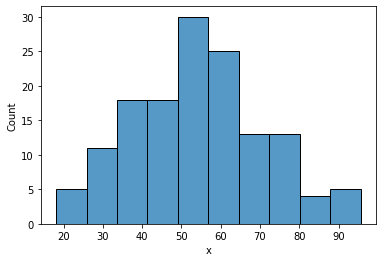

In [51]:
sns.histplot(data = dino[dino.dataset == 'slant_down'], x = 'x')

#sns.histplot(data=grouped_df, x='total_boosters_per_hundred', stat='percent', bins = 20)

<AxesSubplot:xlabel='x', ylabel='Count'>

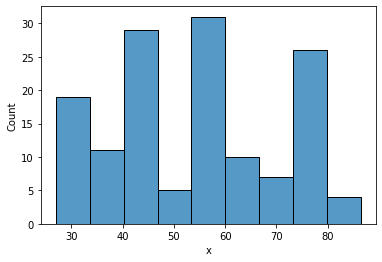

In [74]:
sns.histplot(data = dino[dino.dataset == 'star'], x = 'x')

<AxesSubplot:xlabel='x', ylabel='Count'>

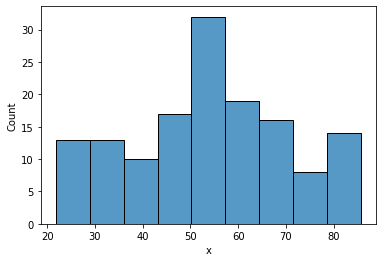

In [61]:
sns.histplot(data = dino[dino.dataset == 'circle'], x = 'x')

<AxesSubplot:>

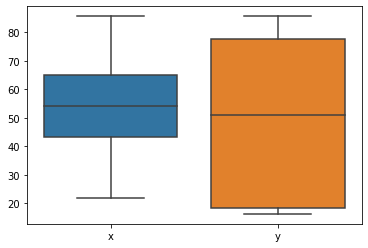

In [62]:
sns.boxplot(data = dino[dino.dataset == 'circle'])

<AxesSubplot:>

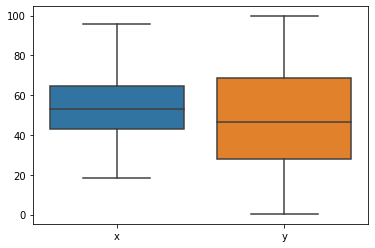

In [63]:
sns.boxplot(data = dino[dino.dataset == 'slant_down'])

FacetGrid is designed to split your data in several categories and plot the same relationship with the same plotting function across all categories for easy comparison

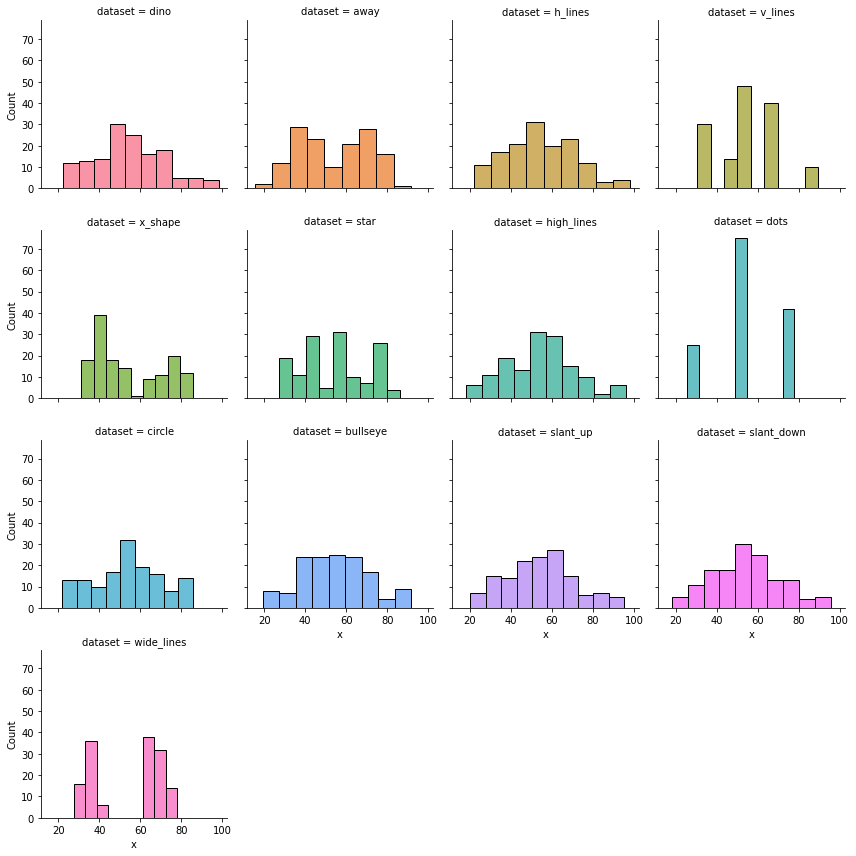

In [10]:
grid_histplots = sns.FacetGrid(dino, col="dataset", hue="dataset", col_wrap=4)
grid_histplots.map_dataframe(sns.histplot, x = 'x')

In [99]:
df = pd.DataFrame({'age1': [10,20,40,60,80,150],                    
                   'age2': [-51,20,40,60,80,151]})
df

,age1,age2
0,10,-51
1,20,20
2,40,40
3,60,60
4,80,80
5,150,151


<AxesSubplot:>

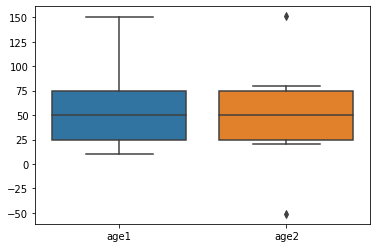

In [100]:
sns.boxplot(data = df)

In [ ]:
grid_scatterplots = sns.FacetGrid(dino, col="dataset", hue="dataset", col_wrap=4)
grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")